## sensitivity (mca)

In [103]:
# Model
import tellurium as te
# Plotting
import seaborn as sns
# Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:

ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)




In [75]:

def get_response_coefficient(model, parameter, species, full_output=False, r_tol: float = 1e-8, scaled: bool=True):
    model.resetToOrigin()
    param_init = model.getValue(parameter)
    species_init = model.getValue(species)
    perturbed_parameter = param_init * 1.01
    model.setValue(parameter, perturbed_parameter)
    result = model.simulate(0, int(1000), 1001,selections=[species])
    # check if steady state
    last_species_change = result[species][-1] -  result[species][-2]
    last_rel_change = abs(last_species_change / result[species][-1])
    if last_rel_change > r_tol:
        print(f'Attention. relative change between last two timepoints was {last_rel_change}.'
               f'Check response for parameter {parameter} and species {species}.')
    new_species = model.getValue(species)
    delta_par = perturbed_parameter - param_init
    delta_spec = new_species - species_init
    unscaled_response_coefficient = delta_spec / delta_par
    response_coefficient = (delta_spec / delta_par) * (param_init / species_init)
    if not scaled:
        response_coefficient = unscaled_response_coefficient
    if not full_output:
        return response_coefficient
    else:
        return response_coefficient, result, last_rel_change


In [123]:
species_of_interest = ant_model.getFloatingSpeciesIds()

for i in ['iE','ART', 'oiE', 'M']:
    species_of_interest.remove(i)

parameters_of_interest = ant_model.getGlobalParameterIds()

for i in ['k_R_death', 'I0_iE','I0_death_iE','hill', 'k_P_death', 'k_P_aging', 'k_R_aging', 'k_E_death', 'k_iE_death', 'k_iE_kill', 'Hb', 't_P_aging', 't_R_aging',
'k_BH_max', 'Vol_plasma', 'Hkt', 'parasitemia', 'R_percent', 'RPI', 'oiE_percent', 'events_medication_on', 'Vol_blood']:
    parameters_of_interest.remove(i)

parameters_of_interest = [p for p in parameters_of_interest if not p.startswith('J_')] 

parameters_of_interest

['t_R_aging_init',
 'param1_TRPaging',
 'param2_TRPaging',
 'Hkt_init',
 'param3_TRPaging',
 't_P_aging_init',
 'LDH_RBC',
 't_E_death',
 'Vol_E',
 'Vol_R',
 'k_P_birth',
 'k_R_infect',
 'k_E_infect',
 'k_iE_rupture',
 'k_M_death',
 'k_ART_decay',
 'k_oiE_death',
 'k_LDH_decay',
 'param1_Pdeath',
 'param2_Pdeath',
 'BH_max',
 'k_BH',
 'k_iE_kill_proportion',
 'Imax_iE',
 'ID50',
 't_halb_ART_decay',
 't_oiE_death',
 't_halb_LDH_decay',
 'N_A',
 'Vol_iE',
 'Vol_oiE',
 'Hb_conc_R',
 'Hb_conc_E',
 'Hb_conc_iE',
 'Hb_conc_oiE',
 't_iE_rupture',
 't_ART_add']

In [124]:



conc_response_coeff = pd.DataFrame(columns=species_of_interest, index=parameters_of_interest, dtype=float)
for p in parameters_of_interest:
    #print(p)
    for s in species_of_interest:
       # print(s)
        c = get_response_coefficient(ant_model, p, s, r_tol=1e-6)
        np.isnan(c)
        conc_response_coeff.loc[p, s] = c


In [125]:
conc_response_coeff

,P,R,E,LDH
t_R_aging_init,-0.011954,0.964173,-0.472866,-0.472872
param1_TRPaging,-0.032062,1.893989,-0.406411,-0.406416
param2_TRPaging,0.001020,0.364241,-0.515743,-0.515749
Hkt_init,-0.011954,0.964173,-0.472866,-0.472872
param3_TRPaging,-0.037549,2.147719,-0.388274,-0.388280
t_P_aging_init,-0.011954,0.964173,-0.472866,-0.472872
LDH_RBC,-0.011954,0.964172,-0.472866,0.522399
t_E_death,0.009565,-0.774639,0.382203,-0.611686
Vol_E,0.009565,-0.774663,-0.611674,-0.611679
Vol_R,-0.011711,0.945549,-0.474341,-0.474347


In [130]:
conc_response_coeff.max().max()

2.1477191084204956

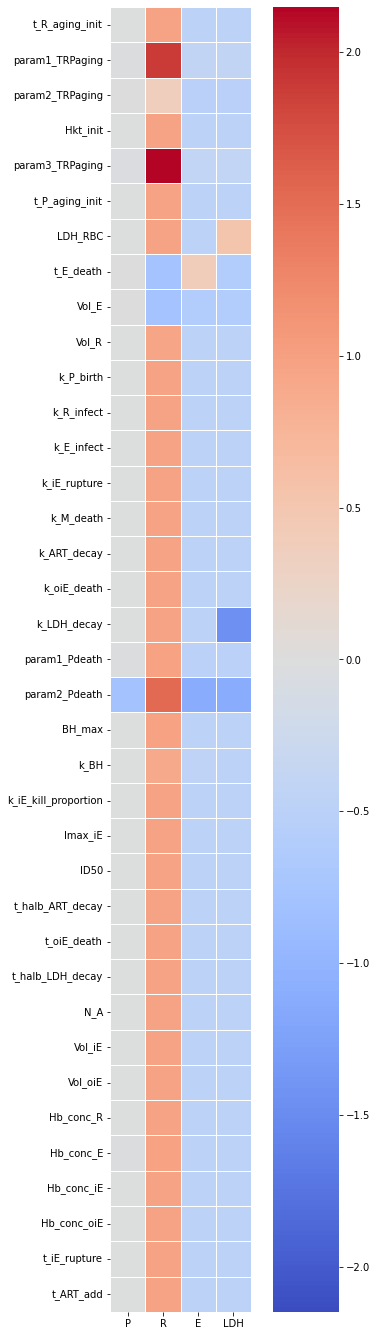

In [135]:
fig, ax = plt.subplots(figsize=(8, 24))
ax = sns.heatmap(conc_response_coeff, square=True, ax=ax, vmin=-max([conc_response_coeff.max().max(), -conc_response_coeff.min().min()]),
                 vmax=max([conc_response_coeff.max().max(), -conc_response_coeff.min().min()]), cmap='coolwarm', linewidth=1)